# 차원 축소(Dimension Reduction)
- 다차원의 데이터 셋의 차원을 축소해 새로운 차원의 데이터 셋을 생성하는 것이다.
- 차원 축소는 단순히 데이터를 압축하는 것이 아닌 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있다.
- `차원`은 말은 학습데이터가 가지는 특성의 개수를 의미한다.
- 일반적으로 차원이 증가할수록 데이터 간의 거리가 기하급수적으로 증가하기 때문에 희소한 구조를 가지게 되고 모델의 예측 신뢰도가 떨어지게 된다.
- 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.
<br>

- 차원 축소는 `특성 선택(Feature Selection)`과 `특성 추출(Feature Extraction)`로 나눌 수 있다.
- `특성 선택`은 데이터의 특징을 잘 나타내는 주요 특성만 선택한다. 불필요한 특성은 제거하는 방법이다.
- `특성 추출은` 기존의 특성을 저차원의 중요 특성으로 압축해서 기존의 특성과는 완전히 다른 새로운 특성을 만드는 방법이다.
    - ex) PCA, SVD, NMF

- 차원축소를 통해 `다중공선성` 문제와 `학습 속도`를 개선시킬 수 있다.
- `PCA`, `LDA`, `SVD`, `NMF` 등의 기법이 존재한다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## PCA(Principal Component Analysis)
- `주성분분석`
- 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하여 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식이다.
- 여러 변수들의 변량을 주성분이라는 서로 상관관계가 높은 변수들의 선형결합으로 만들어 변수를 요약 및 축소하는 기법이다.
- 다중공선성이 존재하는 경우 상관성이 적은 주성분으로 변수들을 축소한다.
- 주성분분석을 통해 차원을 축소한 후 군집분석을 수행하면 군집화 결과와 연산 속도를 개선 가능하다.
- 주성분은 원 변수들 집합에서 k개의 관찰변수 가중치의 결합이다. 이 중에서 주성분1은 가장 많은 분산을 설명하는 k개의 가중치 결합이다.

<br>

```python
from sklearn.decomposition import PCA
```
```python
# PCA 객체가 학습될 때 components_에 주성분이 저장된다.
# 행은 주성분을 나타내고 중요도에 따라서 정렬되어 있다. 
# 열은 원본 데이터의 특성에 대응하는 값이다.
pca.components_ 
```
```python
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값이다.
pca.explained_variance_
```
```python
# 각 주성분의 설명된 분산 비율
pca.explained_variance_ratio_
```
```python
# 분산 변동량의 누적합을 계산한다. => 누적 기여율
# 누적 기여율이 85% 이상이면 주성분의 수로 결정한다.
pca.explained_variance_ratio_.cumsum()
```

### mtcars data

In [20]:
df = pd.read_csv('/content/mtcars.csv')
print(df.shape)
df.head()

(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
# PCA는 데이터의 스케일에 영향을 받기 때문에 PCA 전 스케일링을 해주어야 한다.
scale = StandardScaler()
scaled_df = scale.fit_transform(df.iloc[:, 1:])

In [24]:
# 몇 개의 주성분으로 분해할지 지정해주어야 한다.
pca = PCA(n_components=4)

In [25]:
# PCA를 진행한 값으로 학습을 진행할 경우 입력값(x)에 comp 데이터를 입력해준다.
comp = pca.fit_transform(scaled_df)

In [26]:
pca_df = pd.DataFrame(comp, columns=['Comp1', 'Comp2', 'Comp3', 'Comp4'], index=df.iloc[:, 0])

print(pca_df.shape)
pca_df.head()

(32, 4)


,Comp1,Comp2,Comp3,Comp4
model,,,,
Mazda RX4,0.657213,1.735446,-0.601199,0.115522
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653


In [27]:
loadings = pd.DataFrame(pca.components_.T, columns=['Comp1', 'Comp2', 'Comp3', 'Comp4'], index=df.columns[1:])

print(loadings.shape)
loadings

(11, 4)


,Comp1,Comp2,Comp3,Comp4
mpg,0.362531,0.016124,-0.225744,-0.022540
cyl,-0.373916,0.043744,-0.175311,-0.002592
disp,-0.368185,-0.049324,-0.061484,0.256608
hp,-0.330057,0.248784,0.140015,-0.067676
drat,0.294151,0.274694,0.161189,0.854829
wt,-0.346103,-0.143038,0.341819,0.245899
qsec,0.200456,-0.463375,0.403169,0.068077
vs,0.306511,-0.231647,0.428815,-0.214849
am,0.234943,0.429418,-0.205767,-0.030463
gear,0.206916,0.462349,0.289780,-0.264691


In [28]:
# 표준편차
ax = pd.DataFrame(pca_df.std()).T
ax

,Comp1,Comp2,Comp3,Comp4
0,2.611814,1.654076,0.80463,0.527536


In [29]:
# 표준변차와 분산의 변동량 concat으로 병합
pca_summary = pd.concat([ax, pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])
pca_summary

,Comp1,Comp2,Comp3,Comp4
0,2.611814,1.654076,0.804630,0.527536
0,0.600764,0.240952,0.057018,0.024509


In [30]:
# 반복문을 이용하여 누적합 계산하기
proportion = pca.explained_variance_ratio_
s = 0
result = []
for i in range(len(proportion)) :
    s += proportion[i]
    result.append(np.round(s, 4))

result

[0.6008, 0.8417, 0.8987, 0.9232]

In [31]:
# 위처럼 반복문을 사용하지 않아도 cumsum 함수로 같은 결과를 나타낼 수 있다.
# 누적 기여율 -> 85% 이상이면 주성분의 수로 결정한다.
result = pca.explained_variance_ratio_.cumsum().round(4)
result

array([0.6008, 0.8417, 0.8987, 0.9232])

In [32]:
# 표준편차, 분산을 계산해놓은 pca_summary와 누적 기여율을 계산한 result 값을 병합한다.
# shape가 (4, 1)인 result의 index를 Comp1, ..., Comp4로 변경해준 후 전치(T) 시켜서 pca_summary와 같은 형태로 만들어주기 위함이다.
pd.DataFrame(result).set_index(pca_summary.columns).T

,Comp1,Comp2,Comp3,Comp4
0,0.6008,0.8417,0.8987,0.9232


- 주성분1, 주성분2로 전체 변동의 84%를 설명할 수 있다.

In [33]:
pca_summary = pd.concat([pca_summary, pd.DataFrame(result).set_index(pca_summary.columns).T], axis=0)
pca_summary.index = ['Standard deviation', 'Propotion of variance', 'Cumulative proportion']
pca_summary

,Comp1,Comp2,Comp3,Comp4
Standard deviation,2.611814,1.654076,0.804630,0.527536
Propotion of variance,0.600764,0.240952,0.057018,0.024509
Cumulative proportion,0.600800,0.841700,0.898700,0.923200


- Scree Plot을 활용하여 고유값이 수평을 유지하기 전단계로 주성분의 수를 결정한다.

In [ ]:
# 분산
pca.explained_variance_

array([6.82157445, 2.73596686, 0.64742944, 0.27829413])

In [ ]:
# 분산의 변동량
pca.explained_variance_ratio_

array([0.60076366, 0.24095163, 0.05701793, 0.02450886])

In [ ]:
per_var = np.round(pca.explained_variance_, 1)
per_var

array([6.8, 2.7, 0.6, 0.3])

In [ ]:
# 주성분1, ..., 주성분4
labels = ['주성분' + str(i) for i in range(1, len(per_var) + 1)]

- 3에서 하나 전 단계인 2를 선택한다.
- 즉 주성분1, 2만으로도 충분히 데이터의 분산을 설명 가능하다.

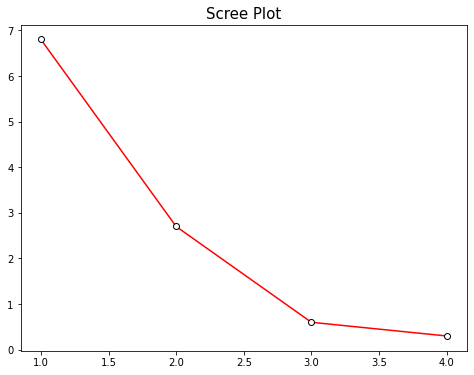

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Scree Plot', fontsize=15)
plt.plot(range(1, 5), per_var,
         marker='o', markerfacecolor='w', markersize=6, markeredgecolor='k', color='r')
plt.show()

In [ ]:
def biplot(score,coeff, labels=None, index = None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize = (12, 9))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,head_width = 0.01)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])
    plt.title("PCA - Biplot",fontsize = 15)
    plt.xlabel("Comp.{}".format(1))
    plt.ylabel("Comp.{}".format(2))
    plt.grid()

- 화살표 길이가 길수록 원변수의 분산을 잘 성명하는 변수라고 할 수 있다.
- 화살표는 원변수와 PC의 상관계수를 뜻하며, PC와 평행할수록 해당 PC에 큰 영향을 미친다.

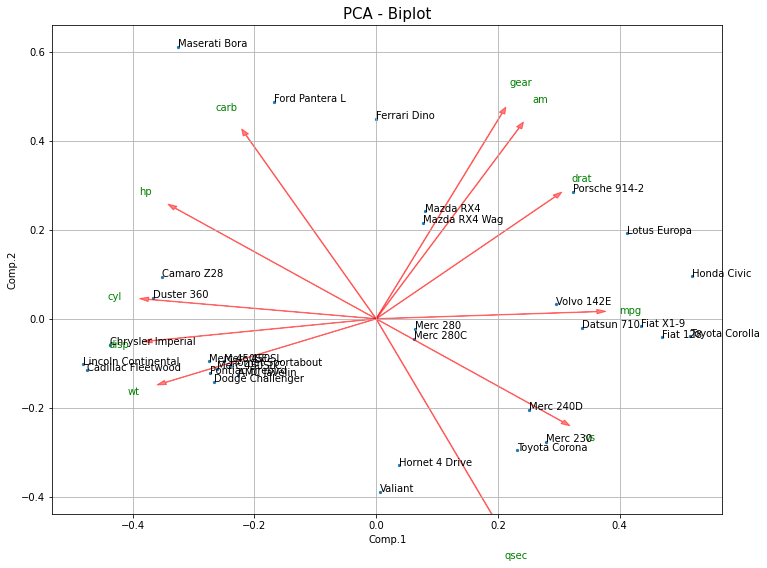

In [ ]:
biplot(comp, np.transpose(pca.components_), labels = df.columns[1:], index = df.iloc[:,0])

### iris data

In [ ]:
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']

df = pd.DataFrame(iris.data, columns=columns)
df['target'] = iris.target

In [ ]:
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# target 변수의 범주는 0, 1, 2로 총 3개
df['target'].unique()

array([0, 1, 2])

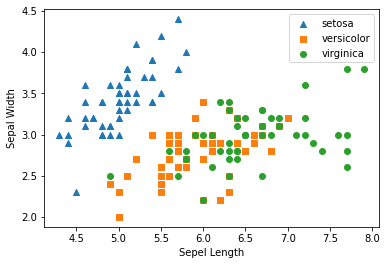

In [ ]:
# PCA 수행 전
# 차원이 4개인 iris 데이터에서 2개의 피처만을 뽑아 데이터 분포 시각화
markers = ['^', 's', 'o']

for i, m in enumerate(markers):
    x_axis = df[df['target'] == i]['sepal_length']
    y_axis = df[df['target'] == i]['sepal_width']
    plt.scatter(x_axis, y_axis, marker=m, label=iris.target_names[i])

plt.legend()
plt.xlabel('Sepel Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
comp = pca.fit_transform(x_scaled)

In [ ]:
pca_df = pd.DataFrame(comp, columns=['Comp1', 'Comp2', 'Comp3', 'Comp4'])
pca_df['target'] = iris.target
pca_df

,Comp1,Comp2,Comp3,Comp4,target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,2
146,1.564580,-0.896687,-0.026371,-0.220192,2
147,1.521170,0.269069,0.180178,-0.119171,2
148,1.372788,1.011254,0.933395,-0.026129,2


- `고유벡터`
- PC1 = 0.521066(sepallength) - 0.269347(sepal width) + 0.580413(petal length) + 0.564857(petal width)
- 고유벡터는 주성분(P)와 표준화된 독립변수(Z) 사이의 관계를 보여준다.

In [ ]:
# 교유벡터
pca_vector = pd.DataFrame(pca.components_.T).set_index(df.columns[:-1])
pca_vector.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pca_vector

,PC1,PC2,PC3,PC4
sepal_length,0.521066,0.377418,-0.719566,-0.261286
sepal_width,-0.269347,0.923296,0.244382,0.123510
petal_length,0.580413,0.024492,0.142126,0.801449
petal_width,0.564857,0.066942,0.634273,-0.523597


In [ ]:
x_df = pd.DataFrame(x_scaled, columns=df.columns[:-1])

- `고유값`
- 각 주성분의 분산과 고유값은 일치한다.

In [ ]:
# 상관 행렬
# 스케일링한 x 데이터를 이용한다.
corr = x_df.corr(method = 'pearson')

# (w = 고유값),(v = 고유벡터),(corr.values=DataFrame인 corr를 numpy array로 변환)
w, v = np.linalg.eig(corr.values)

# 고유값
eig_value = pd.DataFrame(w, columns=['eigenvalue'], index=['PC1', 'PC2', 'PC3', 'PC4'])
eig_value = eig_value.T  # or eig_value.transpose()
eig_value

,PC1,PC2,PC3,PC4
eigenvalue,2.918498,0.91403,0.146757,0.020715


- `기여율`
- 전체 정보량 중 자기 정보량의 비율이다.
- ex) PC1의 기여율 = (2.910818 / 4) = 0.7277045

In [ ]:
# 기여율
eig_value / 4

,PC1,PC2,PC3,PC4
eigenvalue,0.729624,0.228508,0.036689,0.005179


- `누적 기여율`
- 첫번째 주성분부터 자기 정보량까지 총합의 비율이다.
- ex) PC2의 누적 기여율 = (2.918498 + 0991403) / 4 = 0.958132

In [ ]:
# 누적 기여율
(eig_value['PC1'] + eig_value['PC2']) / 4

eigenvalue    0.958132
dtype: float64

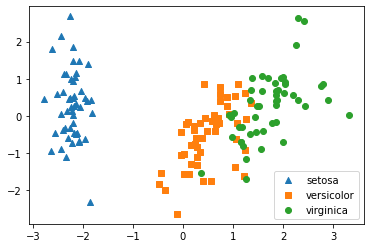

In [ ]:
# PCA 수행 후

markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis = pca_df[pca_df['target']==i]['Comp1']
  y_axis = pca_df[pca_df['target']==i]['Comp2']
  plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.show()

- 위에서 고유벡터와 고유벡터를 이용하여 계산한 기여율, 누적 기여율이 일치함을 확인할 수 있다.

In [ ]:
# 표준편차
pca_std = pd.DataFrame(pca_df.std()).T.drop(['target'], axis=1)

# 각 주성분의 설명된 분산 비율
pca_var = pd.DataFrame(pca.explained_variance_ratio_.T).set_index(pca_std.columns).T

# 누적 기여율
pca_cumsum = pd.DataFrame(pca.explained_variance_ratio_.cumsum()).set_index(pca_std.columns).T

pca_summary = pd.concat([pca_std, pca_var, pca_cumsum])
pca_summary.index = ['Standard deviation', 'Propotion of variance', 'Cumulative proportion']
pca_summary

,Comp1,Comp2,Comp3,Comp4
Standard deviation,1.714084,0.959252,0.384372,0.144409
Propotion of variance,0.729624,0.228508,0.036689,0.005179
Cumulative proportion,0.729624,0.958132,0.994821,1.000000


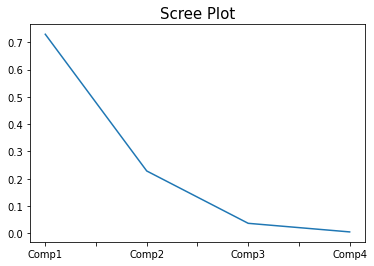

In [ ]:
# 아래의 그래프와 같은 스크리 산점도가 나타난다.
pca_summary.T['분산 비율'].plot()
plt.title('Scree Plot', fontsize=15)
plt.show()

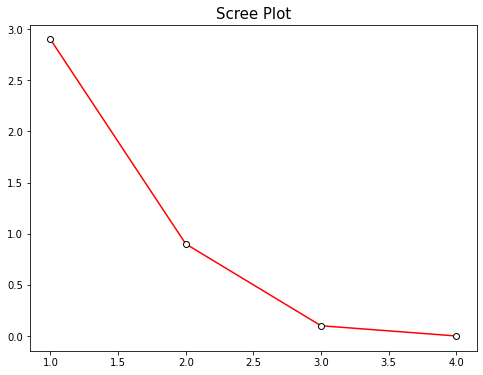

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Scree Plot', fontsize=15)
plt.plot(range(1, 5), np.round(pca.explained_variance_, 1),
         marker='o', markerfacecolor='w', markersize=6, markeredgecolor='k', color='r')
plt.show()

## LDA(Linear Disciminant Analysis)
- `선형 판별 분석`
- PCA와 유사하지만 가장 큰 차이점은 지도학습의 분류 문제에서 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원축소한다.
- 클래스간 분산은 최대한으로 만들고 클래스 내 분산은 최소로 만드는 방법이다.
- `PCA`는 `공분산행렬`을 사용하지만 `LDA`는 클래스간 분산과 클래스내 `분산 행렬`을 생성한 뒤 이 행렬에 기반해 `고유벡터`를 구하여 입력데이터를 투영한다.
- 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다.
- LDA는 PCA와 다르게 비지도학습이 아니라 `지도학습`이다. 즉, `클래스의 결정값`이 변환 시에 필요하다.

<br>

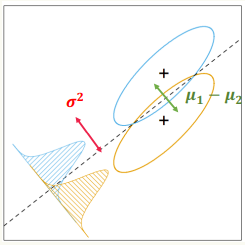

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [ ]:
# LDA 수행
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_scaled, df['target'])  # PCA와 다르게 입력, 출력 데이터를 반드시 넣어줘야 한다.
comp = lda.transform(x_scaled)  # LDA를 적용한 값으로 학습을 진행할 경우 입력값(x)에 comp 데이터를 입력해준다.

comp.shape

(150, 2)

- PCA vs LDA
<br>

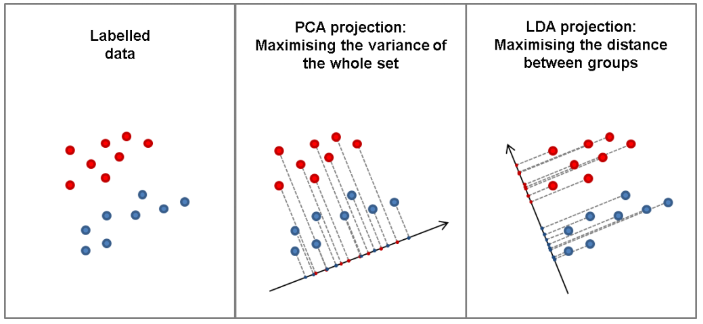

In [ ]:
# PCA
pca.fit_transform(x_scaled)

# LDA
lda.fit(x_scaled, df['target'])
comp = lda.transform(x_scaled)

In [ ]:
lda_df = pd.DataFrame(comp, columns=['Comp1', 'Comp2'])
lda_df['target'] = iris.target

lda_df.head()

,Comp1,Comp2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


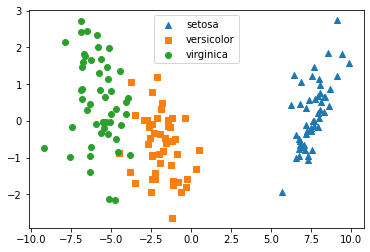

In [ ]:
# LDA 수행 후
markers = ['^', 's', 'o']

for i, m in enumerate(markers):
    x_axis = lda_df[lda_df['target'] == i]['Comp1']
    y_axis = lda_df[lda_df['target'] == i]['Comp2']
    plt.scatter(x_axis, y_axis, marker=m, label=iris.target_names[i])

plt.legend()
plt.show()

In [ ]:
# 표준편차
lda_std = pd.DataFrame(lda_df.std()).T.drop(['target'], axis=1)

# 분산 기여율
lda_var = pd.DataFrame(lda.explained_variance_ratio_).set_index(lda_std.columns).T

# 누적 기여율
lda_cumsum = pd.DataFrame(lda.explained_variance_ratio_.cumsum()).set_index(lda_std.columns).T

In [ ]:
lda_result = pd.concat([lda_std, lda_var, lda_cumsum], axis=0)
lda_result.index = ['Standard deviation', 'Propotion of variance', 'Cumulative proportion']
lda_result

,Comp1,Comp2
Standard deviation,5.722447,1.126116
Propotion of variance,0.991213,0.008787
Cumulative proportion,0.991213,1.000000


## SVD(Singular Value Decomposition)
- `특이값 분해`
- 동일한 중심을 가지는 데이터는 PCA를 돌리나 SVD를 돌리나 동일한 결과가 나타난다. 즉, 둘 다 동일한 스케일링을 해준다면, 동일한 작업을 수행한다.
    - Why?  PCA가 SVD의 알고리즘 방식으로 구현됐기 때문이다.
- `PCA`는 `정방행렬`을 사용했다면, `SVD`는 `m x n 행렬`을 사용한다.
- numpy 와 scipy 로 수학적으로 행렬의 계산으로 할 수 있으나 사이킷런의 `TruncatedSVD` 사용한다.
- `PCA`는 `밀집행렬`에 대한 변환만 가능하다면, `SVD`는 `희소행렬`에 대한 변환도 가능하다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [ ]:
# SVD 수행
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
comp = svd.fit_transform(x_scaled)

comp.shape

(150, 2)

In [ ]:
svd_df = pd.DataFrame(comp, columns=['Comp1', 'Comp2'])
svd_df['target'] = iris.target

svd_df.head()

,Comp1,Comp2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


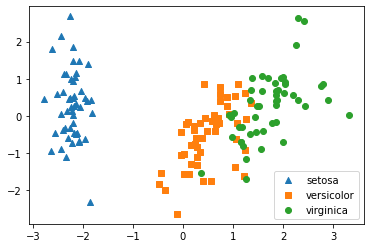

In [ ]:
# SVD 수행 후
markers = ['^', 's', 'o']

for i, m in enumerate(markers):
    x_axis = svd_df[svd_df['target'] == i]['Comp1']
    y_axis = svd_df[svd_df['target'] == i]['Comp2']
    plt.scatter(x_axis, y_axis, marker=m, label=iris.target_names[i])

plt.legend()
plt.show()

In [ ]:
# 표준편차
svd_std = pd.DataFrame(svd_df.std()).T.drop(['target'], axis=1)

# 분산 기여율
svd_var = pd.DataFrame(svd.explained_variance_ratio_).set_index(svd_std.columns).T

# 누적 기여율
svd_cumsum = pd.DataFrame(svd.explained_variance_ratio_.cumsum()).set_index(svd_std.columns).T

In [ ]:
svd_result = pd.concat([svd_std, svd_var, svd_cumsum], axis=0)
svd_result.index = ['Standard deviation', 'Propotion of variance', 'Cumulative proportion']
svd_result

,Comp1,Comp2
Standard deviation,1.714084,0.959252
Propotion of variance,0.729624,0.228508
Cumulative proportion,0.729624,0.958132


## NMF(Non-Negative Matrix Factorization)
- `비음수 행렬 분해`
- 음수를 포함하지 않는 행렬의 행렬분해이다.
- SVD와 유사하지만 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 좀 더 간단하게 두개의 기반 양수 행렬로 분해할 수 있는 기법이다.

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF()
comp = nmf.fit_transform(iris.data)  # 음수값이 있는 데이터는 사용이 불가하다.

comp.shape

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(150, 4)

In [ ]:
nmf_df = pd.DataFrame(comp, columns=['Comp1', 'Comp2', 'Comp3', 'Comp4'])
nmf_df['target'] = iris.target

nmf_df.head()

,Comp1,Comp2,Comp3,Comp4,target
0,0.247574,1.031088,0.027019,0.018325,0
1,0.284162,0.900433,0.004445,0.030612,0
2,0.231275,0.944144,0.023333,0.021675,0
3,0.260587,0.857330,0.032715,0.013894,0
4,0.227945,1.039659,0.039124,0.011740,0


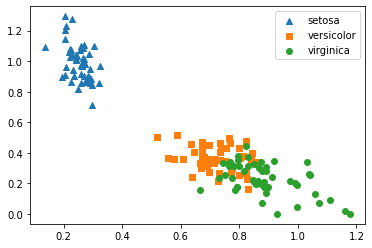

In [ ]:
# NNF 수행 후
markers = ['^', 's', 'o']

for i, m in enumerate(markers):
    x_axis = nmf_df[nmf_df['target'] == i]['Comp1']
    y_axis = nmf_df[nmf_df['target'] == i]['Comp2']
    plt.scatter(x_axis, y_axis, marker=m, label=iris.target_names[i])

plt.legend()
plt.show()

## 정리
### PCA
```python
from sklearn.decomposition import PCA
```
### LDA
fit할 때 x, y 데이터 필요
```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
```
### SVD
```python
from sklearn.decomposition import TruncatedSVD
```
### NMF
음수 데이터는 불가
```python
from sklearn.decomposition import NMF
```